In [1]:
## Getting started and quick glance of dataset

import pandas as pd

# Load data
file_path = "/home/surendran/rag_local/data/breast-cancer-wisconsin-data.csv"
df = pd.read_csv(file_path)

# Basic snapshot
print(df.shape)
print(df.head())


(569, 32)
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst

In [2]:
## Data sanctity verification

# 1. Blanks / missing in first column
print("Missing in column 1:")
print(df.iloc[:, 0].isna().sum())

# 2. Unique values in second column
print("\nUnique values in column 2:")
print(df.iloc[:, 1].unique())

# 3. NA counts in columns 3 to 32
print("\nNA counts in columns 3–32:")
print(df.iloc[:, 2:32].isna().sum().sum())

# 4. Non-numeric check in columns 3 to 32
non_numeric = df.iloc[:, 2:32].apply(
    lambda col: pd.to_numeric(col, errors="coerce").isna().any()
)
print("\nAny non-numeric columns (3–32):")
print(non_numeric[non_numeric])


Missing in column 1:
0

Unique values in column 2:
['M' 'B']

NA counts in columns 3–32:
0

Any non-numeric columns (3–32):
Series([], dtype: bool)


In [ ]:
## Review of data distribution
# looking at only features that matter most.  First two features are not required to be analysed so range of features given

df.iloc[:, 2:32].describe()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


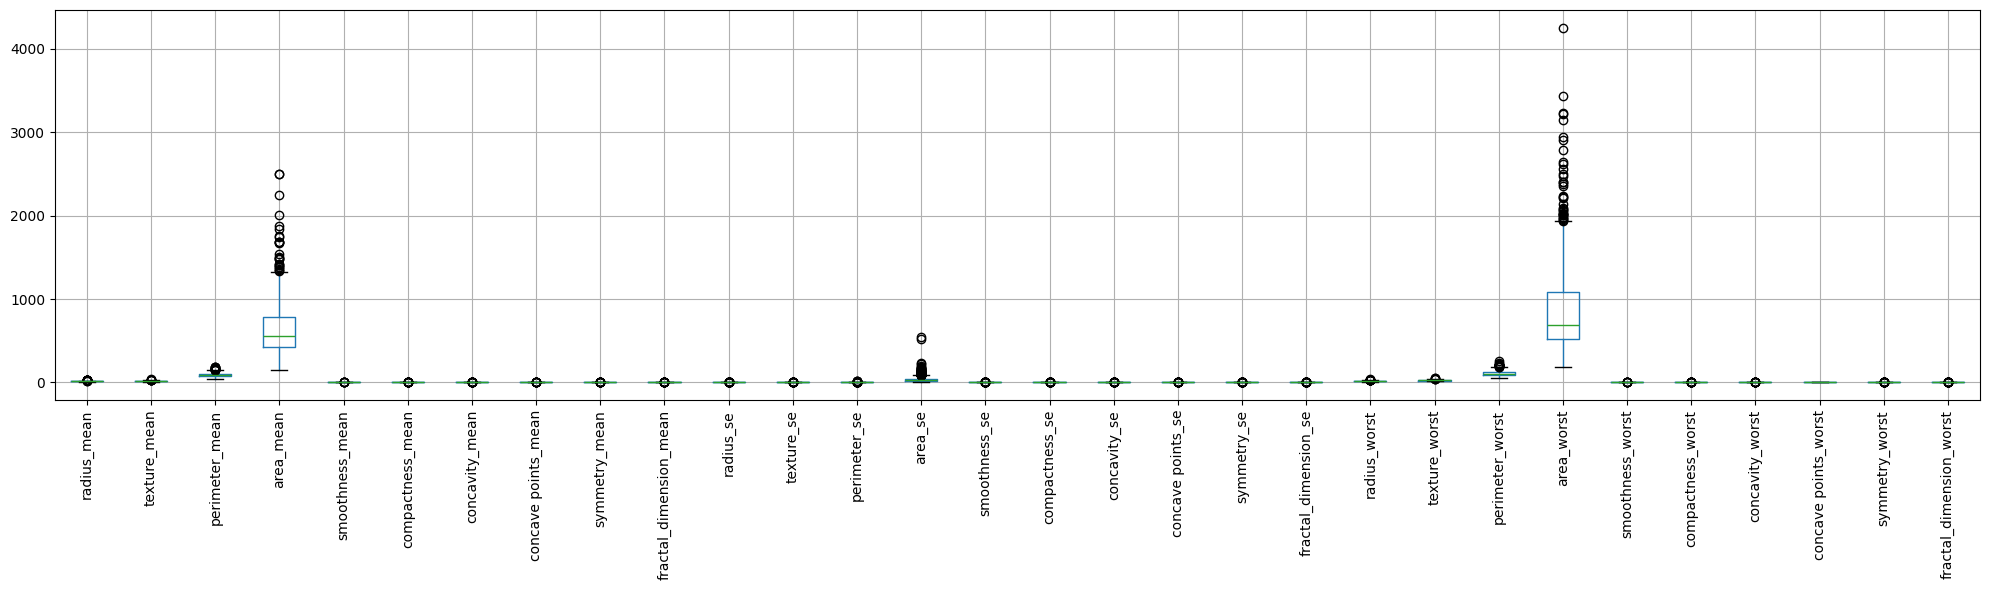

In [4]:
# Box plot of features - shows activity only  features - 4,14, and 24  since they carry largest values in the entire dataset

import matplotlib.pyplot as plt

df.iloc[:, 2:32].boxplot(figsize=(20,6), rot=90)
plt.tight_layout()
plt.show()


In [ ]:
# Review of outliers  - shows most of the features have at least few outliers

Q1 = df.iloc[:, 2:32].quantile(0.25)
Q3 = df.iloc[:, 2:32].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df.iloc[:, 2:32] < (Q1 - 1.5 * IQR)) |
            (df.iloc[:, 2:32] > (Q3 + 1.5 * IQR))).sum()

outliers


radius_mean                14
texture_mean                7
perimeter_mean             13
area_mean                  25
smoothness_mean             6
compactness_mean           16
concavity_mean             18
concave points_mean        10
symmetry_mean              15
fractal_dimension_mean     15
radius_se                  38
texture_se                 20
perimeter_se               38
area_se                    65
smoothness_se              30
compactness_se             28
concavity_se               22
concave points_se          19
symmetry_se                27
fractal_dimension_se       28
radius_worst               17
texture_worst               5
perimeter_worst            15
area_worst                 35
smoothness_worst            7
compactness_worst          16
concavity_worst            12
concave points_worst        0
symmetry_worst             23
fractal_dimension_worst    24
dtype: int64

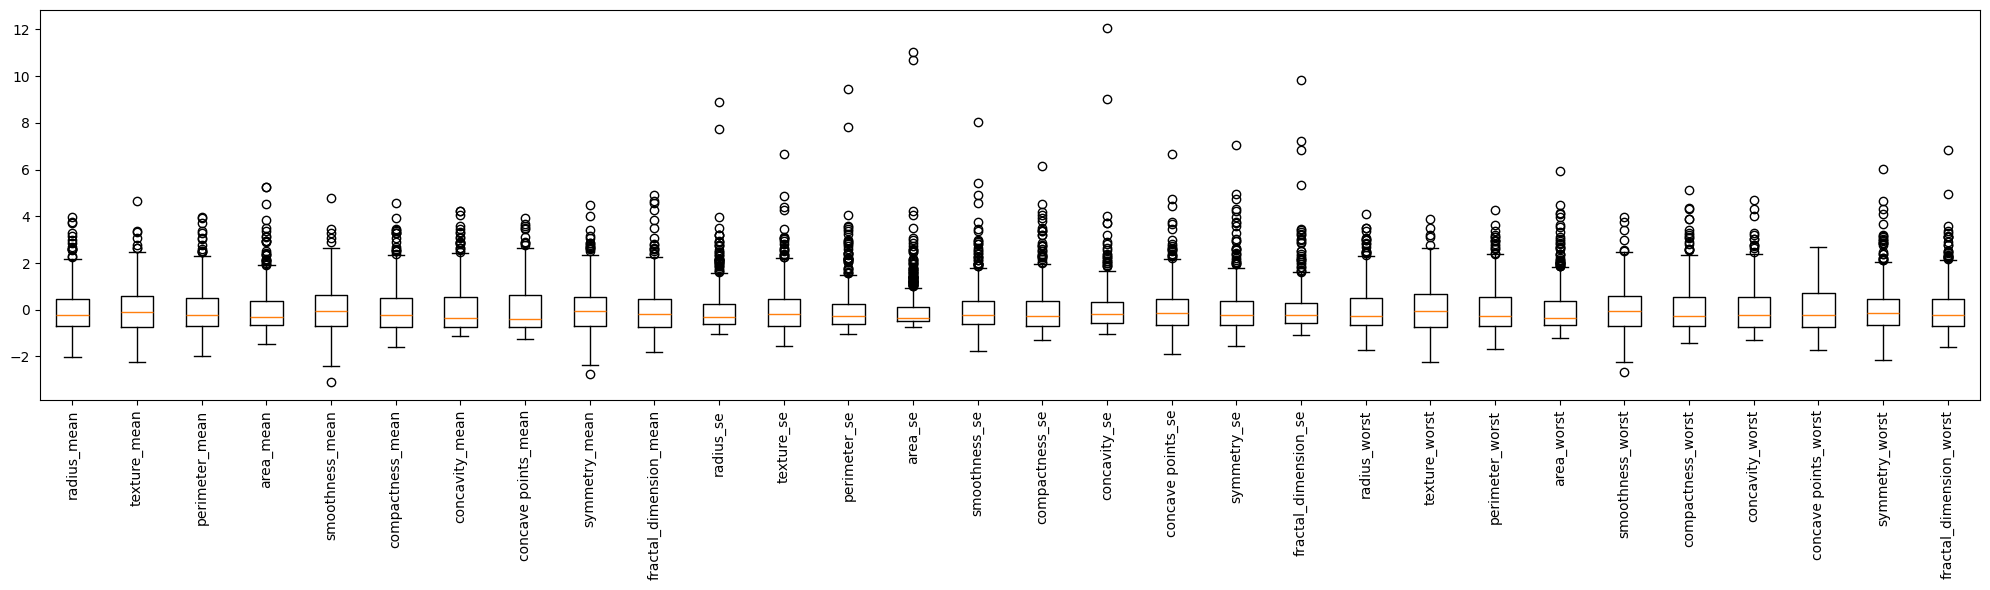

In [8]:
 # Box plot of scaled features - in academic interest


from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

X_scaled = StandardScaler().fit_transform(df.iloc[:, 2:32])

plt.figure(figsize=(20,6))
plt.boxplot(X_scaled, vert=True)
plt.xticks(range(1, X_scaled.shape[1] + 1), df.columns[2:32], rotation=90)
plt.tight_layout()
plt.show()



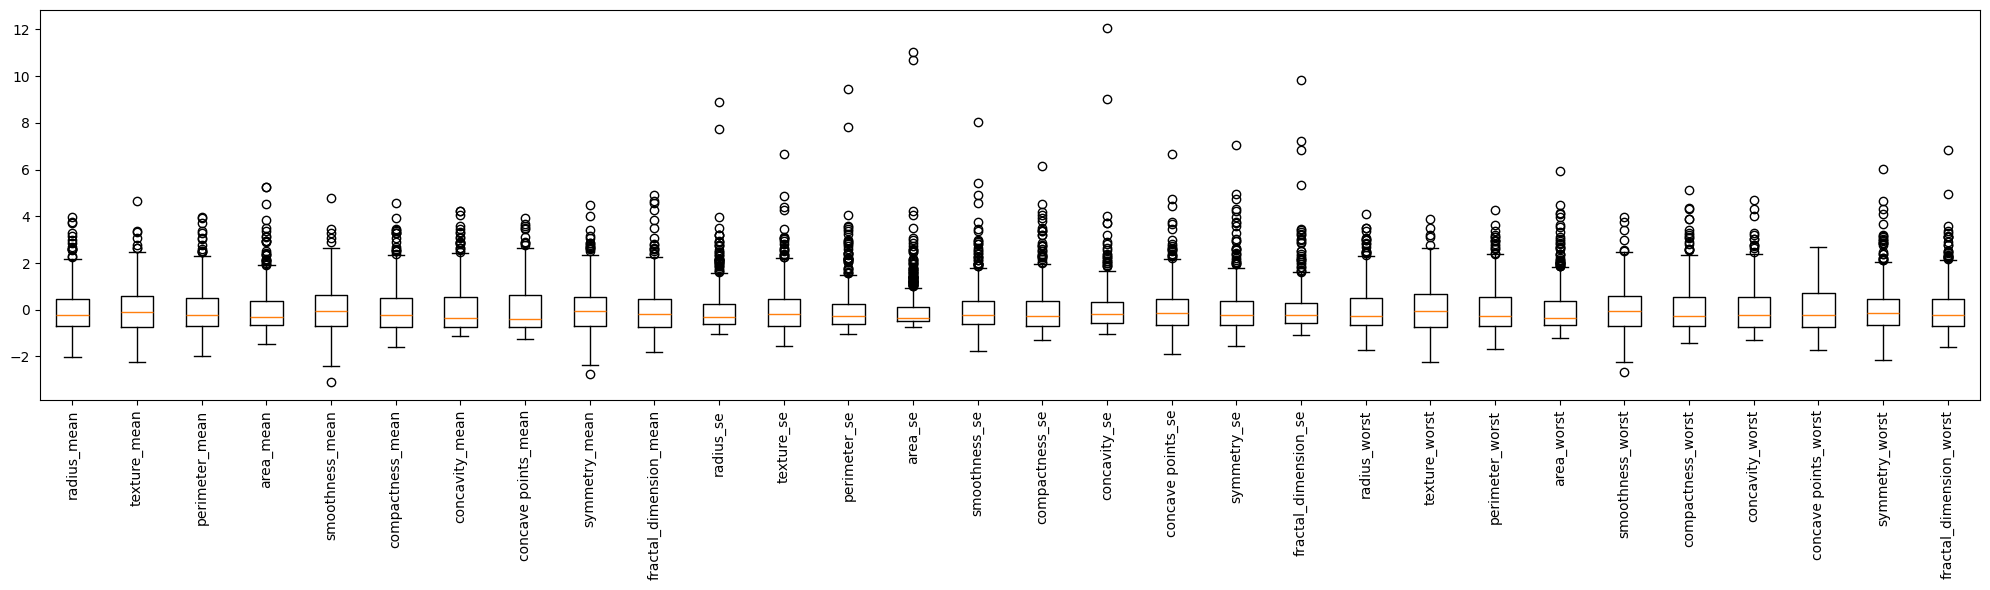

In [ ]:
 # Box plot of scaled features - in academic interest

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

X = df.iloc[:, 2:32]
X_scaled = StandardScaler().fit_transform(X)

plt.figure(figsize=(20,6))
plt.boxplot(X_scaled, vert=True, showfliers=True)
plt.xticks(range(1, X.shape[1] + 1), X.columns, rotation=90)
plt.tight_layout()
plt.show()

In [12]:
# Review of outliers  after scaling  - shows most of the features have at least few outliers (Same result like earlier AS expected)

import pandas as pd
import numpy as np

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

Q1 = X_scaled_df.quantile(0.25)
Q3 = X_scaled_df.quantile(0.75)
IQR = Q3 - Q1

outlier_counts = (
    (X_scaled_df < (Q1 - 1.5 * IQR)) |
    (X_scaled_df > (Q3 + 1.5 * IQR))
).sum()

outlier_counts


radius_mean                14
texture_mean                7
perimeter_mean             13
area_mean                  25
smoothness_mean             6
compactness_mean           16
concavity_mean             18
concave points_mean        10
symmetry_mean              15
fractal_dimension_mean     15
radius_se                  38
texture_se                 20
perimeter_se               38
area_se                    65
smoothness_se              30
compactness_se             28
concavity_se               22
concave points_se          19
symmetry_se                27
fractal_dimension_se       28
radius_worst               17
texture_worst               5
perimeter_worst            15
area_worst                 35
smoothness_worst            7
compactness_worst          16
concavity_worst            12
concave points_worst        0
symmetry_worst             23
fractal_dimension_worst    24
dtype: int64

In [ ]:
# Calculating accuracy scores with Logstic Regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Features and target
X = df.iloc[:, 2:32]
y = df.iloc[:, 1].map({"M": 1, "B": 0})

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Pipeline: scaling + linear classifier
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=500))
])

# Fit
pipe.fit(X_train, y_train)

# Quick check
print("Train accuracy:", pipe.score(X_train, y_train))
print("Test accuracy:", pipe.score(X_test, y_test))


Train accuracy: 0.9868131868131869
Test accuracy: 0.9649122807017544


In [ ]:
# Calculating accuracy scores with Linear SVR

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

# Features and target
X = df.iloc[:, 2:32]
y = df.iloc[:, 1].map({"M": 1, "B": 0})

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Pipeline: scaling + linear SVM
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="linear"))
])

# Fit
pipe.fit(X_train, y_train)

# Accuracy check
print("Train accuracy:", pipe.score(X_train, y_train))
print("Test accuracy:", pipe.score(X_test, y_test))


Train accuracy: 0.989010989010989
Test accuracy: 0.9649122807017544


In [ ]:
# Confusion Metrics for Logistic Regresion

from sklearn.metrics import confusion_matrix, classification_report

# Predictions
y_pred_lr = pipe.predict(X_test)   # assuming earlier LogisticRegression pipeline

# Confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix (Logistic Regression):")
print(cm_lr)

# Optional readable breakdown
print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_lr, target_names=["Benign", "Malignant"]))


Confusion Matrix (Logistic Regression):
[[72  0]
 [ 4 38]]

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

      Benign       0.95      1.00      0.97        72
   Malignant       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



In [ ]:
# Confusion Metrics for Linear SVC

from sklearn.metrics import confusion_matrix, classification_report

# Predictions
y_pred_svm = pipe.predict(X_test)   # assuming SVM pipeline now assigned to pipe

# Confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix (Linear SVM):")
print(cm_svm)

# Optional readable breakdown
print("\nClassification Report (Linear SVM):")
print(classification_report(y_test, y_pred_svm, target_names=["Benign", "Malignant"]))


Confusion Matrix (Linear SVM):
[[72  0]
 [ 4 38]]

Classification Report (Linear SVM):
              precision    recall  f1-score   support

      Benign       0.95      1.00      0.97        72
   Malignant       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

